In [194]:
import yfinance as yf
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [195]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.ensemble import RandomForestRegressor

## Implementando o modelo de ML com LinearRegression

### Coleta de dados
 - Utilizando a lib **yFinance** para extracao de dados de cotacoes do dia 01/01/2015 a 31/07/2024
 - Download de dados historicos

In [243]:
warnings.filterwarnings('ignore')

tickers = [
    'PETR4.SA',  # Petrobras
    'VALE3.SA',  # Vale
    'ITUB4.SA',  # Itaú Unibanco
    'BBDC4.SA',  # Bradesco
    'BBAS3.SA',  # Banco do Brasil
    'ABEV3.SA',  # Ambev
    'B3SA3.SA',  # B3
    'WEGE3.SA',  # WEG
    'RENT3.SA',  # Localiza
    'JBSS3.SA',  # JBS
    'MGLU3.SA',  # Magazine Luiza
    'BRFS3.SA',  # BRF
    'SUZB3.SA',  # Suzano
    'GGBR4.SA',  # Gerdau
    'CSNA3.SA',  # CSN
    'LREN3.SA',  # Lojas Renner
    'RAIL3.SA',  # Rumo
    'KLBN11.SA', # Klabin
    'EGIE3.SA',  # Engie Brasil
    'ELET3.SA'   # Eletrobras
]

start_date = '2015-01-01'
end_date = '2024-07-31'

In [244]:
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

### Preparacao dos dados
- Calculo de metricas como volatilidade, data, media movel de 5 dias. Estas metricas sao usadas como Features no treinamento do modelo. 

In [245]:
def prepare_data(df):
    df['Date'] = df.index
    df['Return'] = df['Close'].pct_change()
    df['Moving_Average'] = df['Close'].rolling(window=5).mean()
    df['Volatility'] = df['Return'].rolling(window=5).std()
    df.dropna(inplace=True)
    return df[['Date', 'Close', 'Moving_Average', 'Volatility']]

In [246]:
prepared_data = {}
for ticker in tickers:
    prepared_data[ticker] = prepare_data(data[ticker])


### Treinamento do modelo 
- Separando os dados em 80% para treino e 20% para teste
- Modelo foi ajustado para prever o preco de fechamentro das acoes com base nas features calculadas.
- Avaliacao do modelo com metricas de MSE e MAE para medir a precisao do modelo


In [248]:
# Treinamento e teste para previsão
def train_and_predict(df, ticker):
    X = df[['Moving_Average', 'Volatility']]
    y = df['Close']

    # Divisão dos dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modelo de Regressão Linear
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Previsão
    y_pred = model.predict(X_test)

    # Avaliação
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Modelo para {ticker}:')
    print(f'MSE: {mse:.2f}, MAE: {mae:.2f}')

    return model

- Treinamento e previsao das acoes utilizando a funcao **train_and_predict**

In [249]:
models = {}
for ticker in tickers:
    models[ticker] = train_and_predict(prepared_data[ticker], ticker)

Modelo para PETR4.SA:
MSE: 0.55, MAE: 0.50
Modelo para VALE3.SA:
MSE: 1.94, MAE: 0.98
Modelo para ITUB4.SA:
MSE: 0.34, MAE: 0.43
Modelo para BBDC4.SA:
MSE: 0.19, MAE: 0.32
Modelo para BBAS3.SA:
MSE: 0.25, MAE: 0.35
Modelo para ABEV3.SA:
MSE: 0.09, MAE: 0.22
Modelo para B3SA3.SA:
MSE: 0.11, MAE: 0.21
Modelo para WEGE3.SA:
MSE: 0.39, MAE: 0.37
Modelo para RENT3.SA:
MSE: 1.37, MAE: 0.73
Modelo para JBSS3.SA:
MSE: 0.31, MAE: 0.38
Modelo para MGLU3.SA:
MSE: 9.67, MAE: 1.61
Modelo para BRFS3.SA:
MSE: 0.69, MAE: 0.57
Modelo para SUZB3.SA:
MSE: 0.98, MAE: 0.62
Modelo para GGBR4.SA:
MSE: 0.19, MAE: 0.29
Modelo para CSNA3.SA:
MSE: 0.38, MAE: 0.41
Modelo para LREN3.SA:
MSE: 0.74, MAE: 0.54
Modelo para RAIL3.SA:
MSE: 0.15, MAE: 0.29
Modelo para KLBN11.SA:
MSE: 0.16, MAE: 0.28
Modelo para EGIE3.SA:
MSE: 0.34, MAE: 0.42
Modelo para ELET3.SA:
MSE: 0.84, MAE: 0.61


### Previsoes futuras 
- O modelo foi utilizado para prever as acoes do mes de Agosto de 2024

In [203]:
future_dates = pd.date_range(start='2024-08-01', end='2024-08-31', freq='B')  # Dias úteis
future_data = pd.DataFrame(index=future_dates)

- Para que gerar as previsoes, foi utilizado campos como **Media Movel** e **Volatilidade**, com valores mais recentes destes campos.

In [204]:
for ticker in tickers:
    predictions = []
    last_moving_average = prepared_data[ticker]['Moving_Average'].iloc[-1]
    last_volatility = prepared_data[ticker]['Volatility'].iloc[-1]
    last_close = prepared_data[ticker]['Close'].iloc[-1]

    for date in future_dates:
        # Prever o próximo valor
        prediction = models[ticker].predict(np.array([[last_moving_average, last_volatility]]).reshape(1, -1))
        predictions.append(prediction[0])
        
        # Atualiza os dados para a próxima previsão
        new_row = pd.Series({
            'Moving_Average': last_moving_average,
            'Volatility': last_volatility,
            'Close': prediction[0]
        }, name=date)
        
        prepared_data[ticker] = pd.concat([prepared_data[ticker], new_row.to_frame().T])

        # Atualizando os valores para a próxima iteração
        last_close = prediction[0]
        
        # Recalcula 'Return', 'Moving_Average' e 'Volatility'
        prepared_data[ticker]['Return'] = prepared_data[ticker]['Close'].pct_change()
        last_moving_average = prepared_data[ticker]['Close'].rolling(window=5).mean().iloc[-1]
        last_volatility = prepared_data[ticker]['Return'].rolling(window=5).std().iloc[-1]

    future_data[ticker] = predictions

- Download dos dados de agosto de 2024
- Preparar os dados reais

In [205]:
real_data = {}
for ticker in tickers:
    real_data[ticker] = yf.download(ticker, start='2024-08-01', end='2024-09-01')

real_data_prepared = {}
for ticker in tickers:
    real_data_prepared[ticker] = prepare_data(real_data[ticker])

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

### Comparacao com dados reais
- Comparacao dos resultados do modelo, com os precos de fechamento reais
- Visualizacao grafica da comparacao.


Comparação para AAPL:
                 Data    Previsto        Real
2024-08-01 2024-08-01  218.560804  226.509995
2024-08-02 2024-08-02  218.061205  226.399994
2024-08-05 2024-08-05  218.141505  224.529999
2024-08-06 2024-08-06  218.141505  226.839996
2024-08-07 2024-08-07  218.141505  227.179993
2024-08-08 2024-08-08  218.141505  228.029999
2024-08-09 2024-08-09  218.141505  226.490005
2024-08-12 2024-08-12  218.141505  229.789993
2024-08-13 2024-08-13  218.141505  229.000000


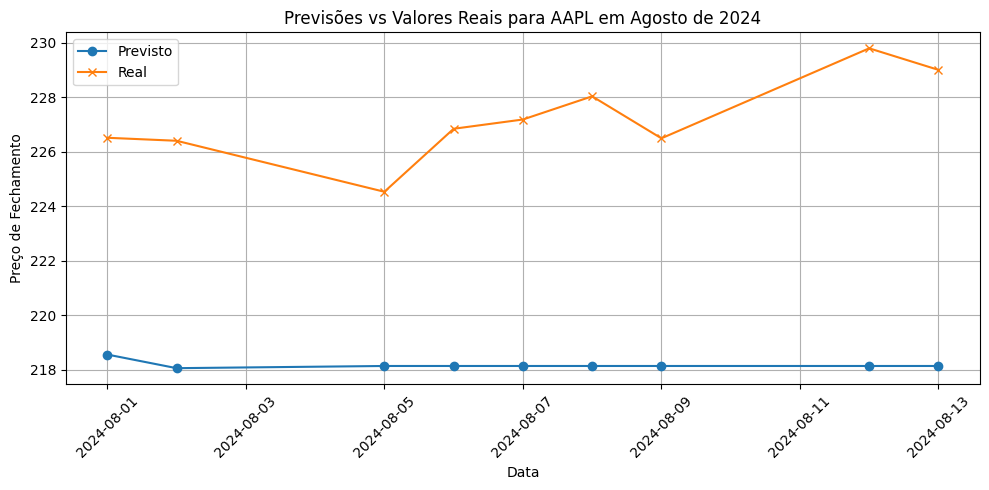


Comparação para MSFT:
                 Data    Previsto        Real
2024-08-01 2024-08-01  421.876809  424.799988
2024-08-02 2024-08-02  415.782704  424.140015
2024-08-05 2024-08-05  416.121504  415.549988
2024-08-06 2024-08-06  415.006501  416.790009
2024-08-07 2024-08-07  414.833399  413.489990
2024-08-08 2024-08-08  414.800299  413.839996
2024-08-09 2024-08-09  413.171999  410.600006
2024-08-12 2024-08-12  411.552699  413.119995
2024-08-13 2024-08-13  409.041198  417.140015


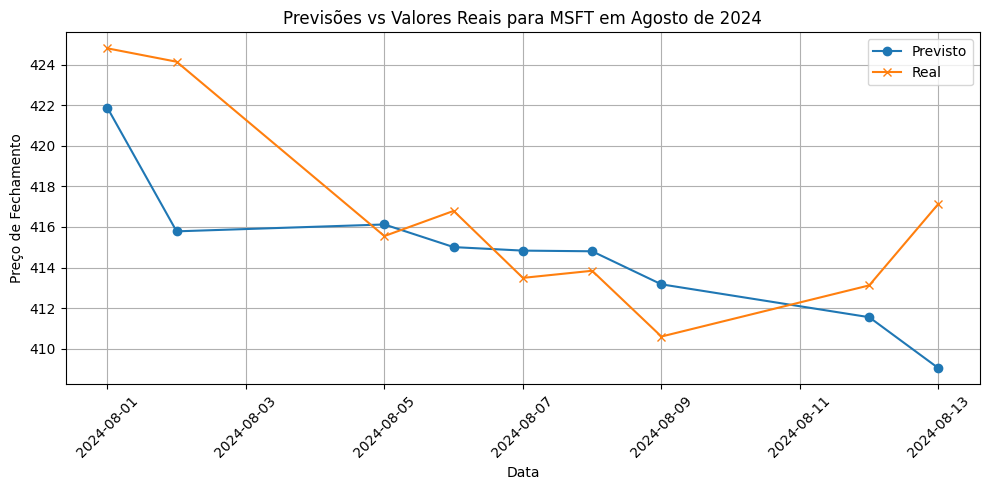


Comparação para PETR4.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  37.036901  38.290001
2024-08-02 2024-08-02  37.350100  38.060001
2024-08-05 2024-08-05  37.558700  37.119999
2024-08-06 2024-08-06  37.638600  36.889999
2024-08-07 2024-08-07  37.430600  39.570000
2024-08-08 2024-08-08  37.511500  39.040001
2024-08-09 2024-08-09  37.683700  39.599998
2024-08-12 2024-08-12  37.704400  39.330002
2024-08-13 2024-08-13  37.891300  39.369999


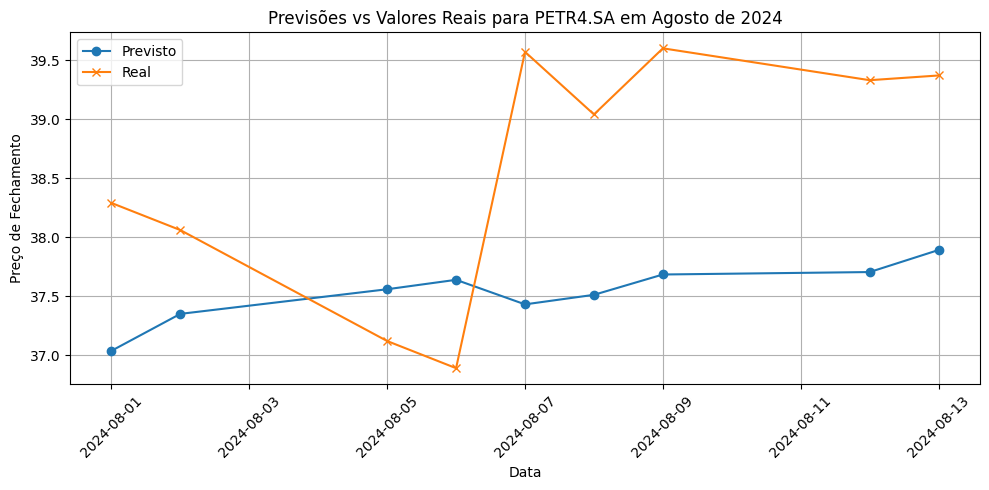


Comparação para VALE3.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  60.401801  57.200001
2024-08-02 2024-08-02  60.507601  58.299999
2024-08-05 2024-08-05  60.809400  58.380001
2024-08-06 2024-08-06  60.871600  57.400002
2024-08-07 2024-08-07  59.587601  58.049999
2024-08-08 2024-08-08  59.512501  59.799999
2024-08-09 2024-08-09  59.754201  59.369999
2024-08-12 2024-08-12  59.163401  59.299999
2024-08-13 2024-08-13  59.147200  59.580002


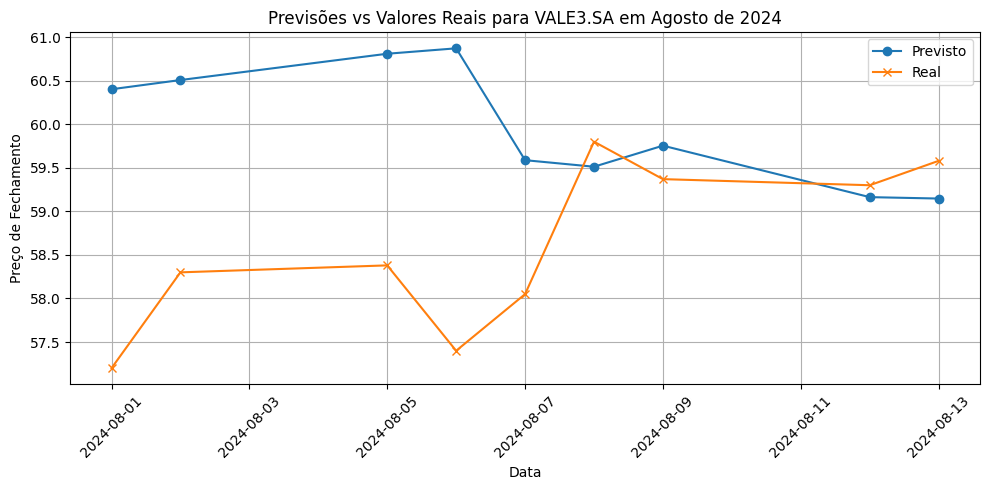


Comparação para ITUB4.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  34.400634  37.230000
2024-08-02 2024-08-02  34.472034  37.080002
2024-08-05 2024-08-05  34.508933  36.740002
2024-08-06 2024-08-06  34.668700  36.459999
2024-08-07 2024-08-07  34.653566  36.540001
2024-08-08 2024-08-08  34.665899  36.580002
2024-08-09 2024-08-09  34.637833  37.369999
2024-08-12 2024-08-12  34.582133  36.959999
2024-08-13 2024-08-13  34.584599  36.700001


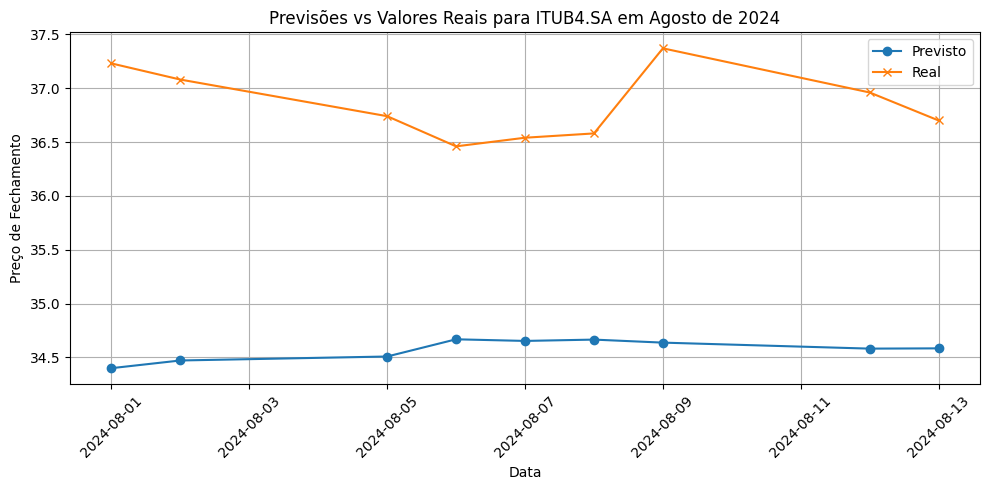


Comparação para BBDC4.SA:
                 Data   Previsto   Real
2024-08-01 2024-08-01  12.402580  15.70
2024-08-02 2024-08-02  12.416334  15.63
2024-08-05 2024-08-05  12.442434  15.52
2024-08-06 2024-08-06  12.445265  15.66
2024-08-07 2024-08-07  12.449791  15.61
2024-08-08 2024-08-08  12.381023  15.42
2024-08-09 2024-08-09  12.412575  15.67
2024-08-12 2024-08-12  12.445489  15.63
2024-08-13 2024-08-13  12.368886  15.64


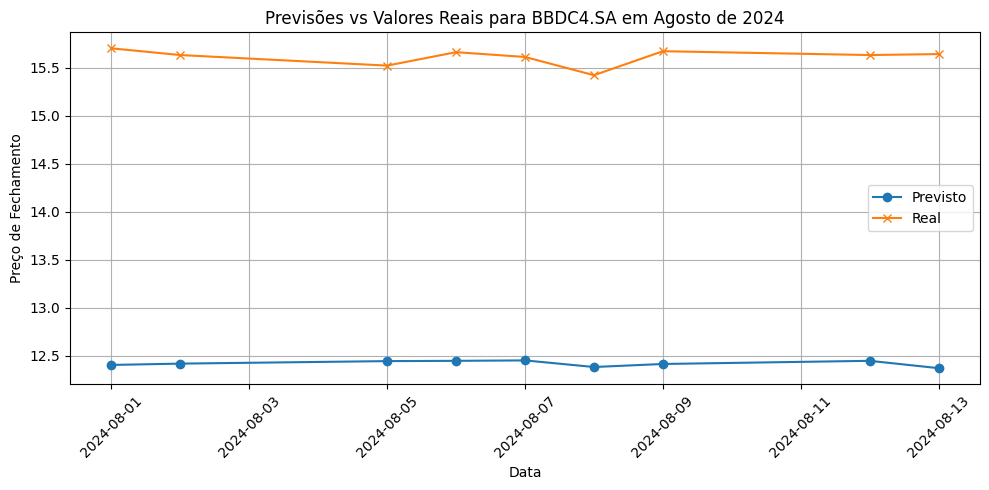


Comparação para BBAS3.SA:
                 Data  Previsto       Real
2024-08-01 2024-08-01  26.94050  29.260000
2024-08-02 2024-08-02  27.05800  29.129999
2024-08-05 2024-08-05  27.11740  28.010000
2024-08-06 2024-08-06  27.14275  28.219999
2024-08-07 2024-08-07  27.11885  28.330000
2024-08-08 2024-08-08  26.91045  28.010000
2024-08-09 2024-08-09  27.05880  28.180000
2024-08-12 2024-08-12  27.05125  28.299999
2024-08-13 2024-08-13  27.04135  28.120001


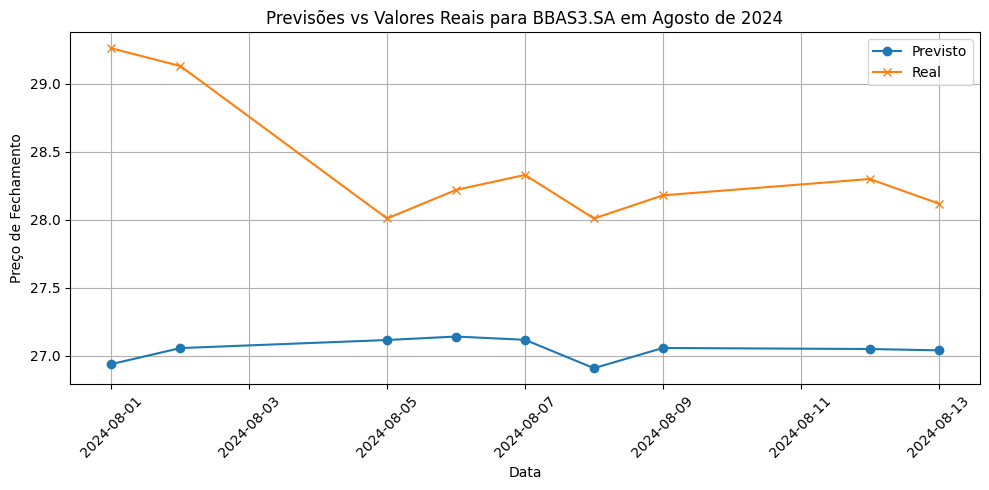


Comparação para ABEV3.SA:
                 Data  Previsto   Real
2024-08-01 2024-08-01   11.6948  12.94
2024-08-02 2024-08-02   11.7568  12.94
2024-08-05 2024-08-05   11.7662  13.00
2024-08-06 2024-08-06   11.7856  13.08
2024-08-07 2024-08-07   11.7749  13.08
2024-08-08 2024-08-08   11.7065  13.03
2024-08-09 2024-08-09   11.7514  12.95
2024-08-12 2024-08-12   11.7611  12.86
2024-08-13 2024-08-13   11.7117  12.86


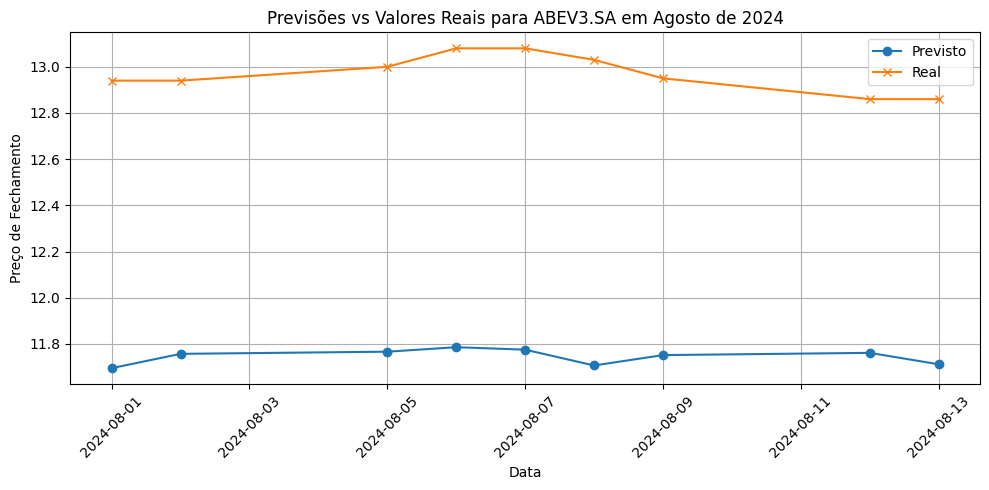


Comparação para B3SA3.SA:
                 Data   Previsto   Real
2024-08-01 2024-08-01  10.734167  12.90
2024-08-02 2024-08-02  10.672966  12.96
2024-08-05 2024-08-05  10.637933  12.54
2024-08-06 2024-08-06  10.599433  12.74
2024-08-07 2024-08-07  10.559266  12.80
2024-08-08 2024-08-08  10.565767  12.65
2024-08-09 2024-08-09  10.498700  12.70
2024-08-12 2024-08-12  10.524967  12.54
2024-08-13 2024-08-13  10.521667  12.68


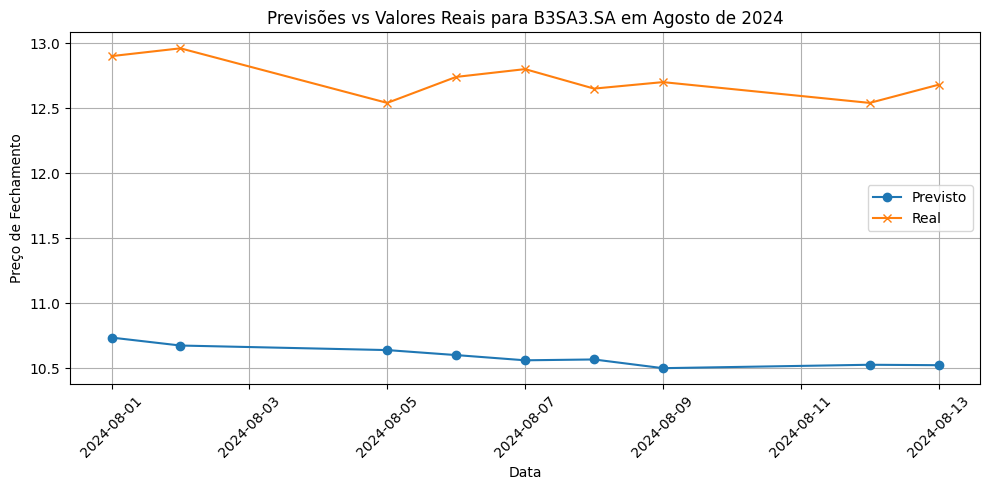


Comparação para WEGE3.SA:
                 Data  Previsto       Real
2024-08-01 2024-08-01  45.99035  53.110001
2024-08-02 2024-08-02  45.95040  53.430000
2024-08-05 2024-08-05  46.12845  54.200001
2024-08-06 2024-08-06  46.12620  53.810001
2024-08-07 2024-08-07  46.11735  54.080002
2024-08-08 2024-08-08  46.04535  54.000000
2024-08-09 2024-08-09  46.05390  54.000000
2024-08-12 2024-08-12  46.06575  53.540001
2024-08-13 2024-08-13  46.05390  54.150002


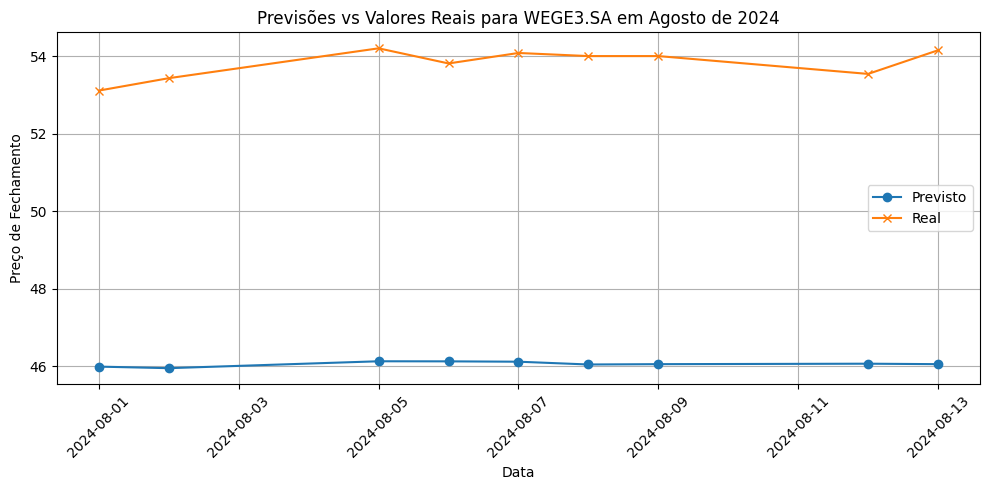


Comparação para RENT3.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  42.366019  42.970001
2024-08-02 2024-08-02  42.318104  43.700001
2024-08-05 2024-08-05  41.577549  41.939999
2024-08-06 2024-08-06  41.317677  42.299999
2024-08-07 2024-08-07  41.137386  42.279999
2024-08-08 2024-08-08  40.877261  42.900002
2024-08-09 2024-08-09  40.960130  42.500000
2024-08-12 2024-08-12  40.900168  41.750000
2024-08-13 2024-08-13  40.894567  41.369999


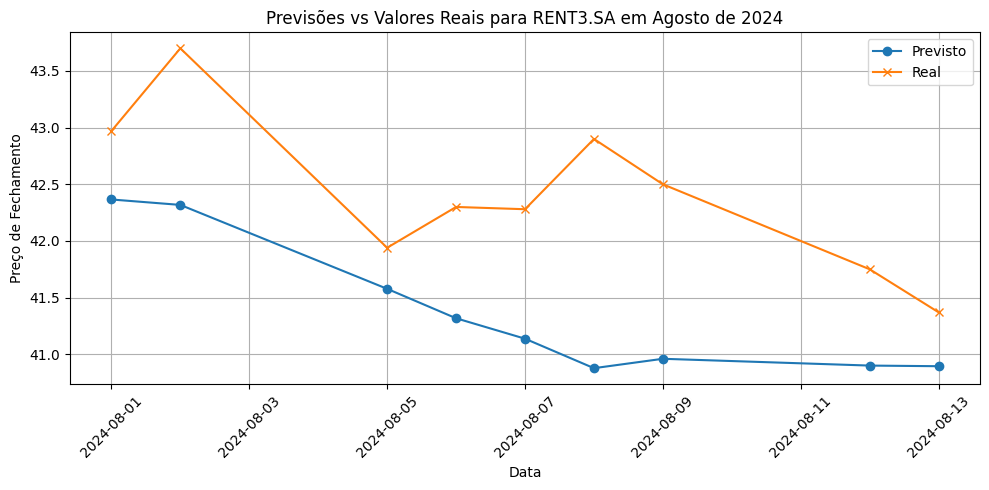


Comparação para JBSS3.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  33.914101  36.130001
2024-08-02 2024-08-02  32.457100  36.549999
2024-08-05 2024-08-05  33.010201  36.209999
2024-08-06 2024-08-06  33.610100  34.830002
2024-08-07 2024-08-07  33.581700  35.000000
2024-08-08 2024-08-08  32.789600  34.980000
2024-08-09 2024-08-09  33.102000  35.040001
2024-08-12 2024-08-12  32.663299  34.939999
2024-08-13 2024-08-13  32.597699  35.000000


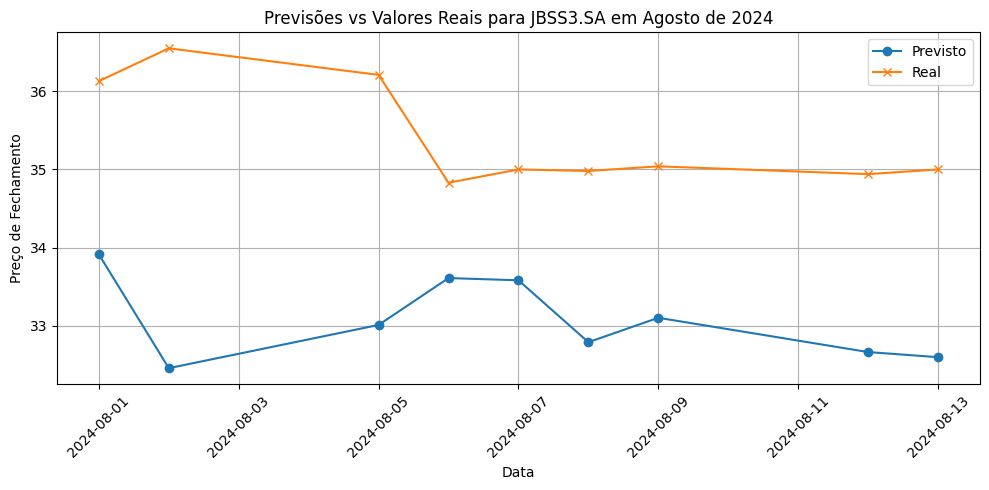


Comparação para MGLU3.SA:
                 Data   Previsto   Real
2024-08-01 2024-08-01  11.246370  13.80
2024-08-02 2024-08-02  11.268970  13.85
2024-08-05 2024-08-05  11.290378  13.18
2024-08-06 2024-08-06  11.262471  13.62
2024-08-07 2024-08-07  11.327971  13.35
2024-08-08 2024-08-08  11.344632  13.47
2024-08-09 2024-08-09  11.290832  13.18
2024-08-12 2024-08-12  11.288724  12.89
2024-08-13 2024-08-13  11.287624  12.16


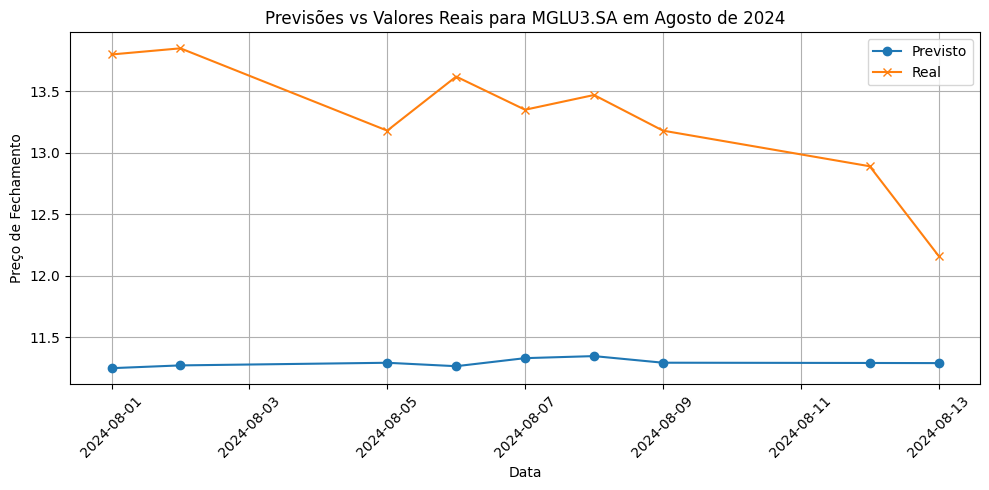


Comparação para BRFS3.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  21.259153  25.400000
2024-08-02 2024-08-02  21.018247  26.030001
2024-08-05 2024-08-05  20.879336  25.709999
2024-08-06 2024-08-06  20.851232  25.190001
2024-08-07 2024-08-07  20.849341  25.299999
2024-08-08 2024-08-08  20.797956  25.910000
2024-08-09 2024-08-09  20.859097  26.030001
2024-08-12 2024-08-12  20.697501  25.799999
2024-08-13 2024-08-13  20.307081  26.230000


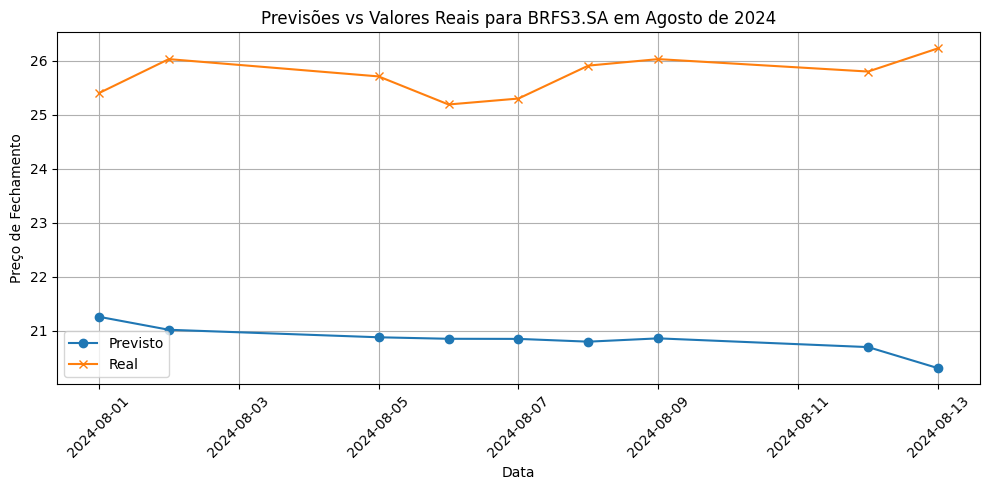


Comparação para SUZB3.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  53.237699  55.869999
2024-08-02 2024-08-02  52.774500  56.459999
2024-08-05 2024-08-05  52.856099  56.410000
2024-08-06 2024-08-06  52.544901  56.080002
2024-08-07 2024-08-07  52.611301  55.180000
2024-08-08 2024-08-08  52.262601  55.619999
2024-08-09 2024-08-09  52.398300  56.080002
2024-08-12 2024-08-12  52.363200  55.500000
2024-08-13 2024-08-13  52.754801  55.000000


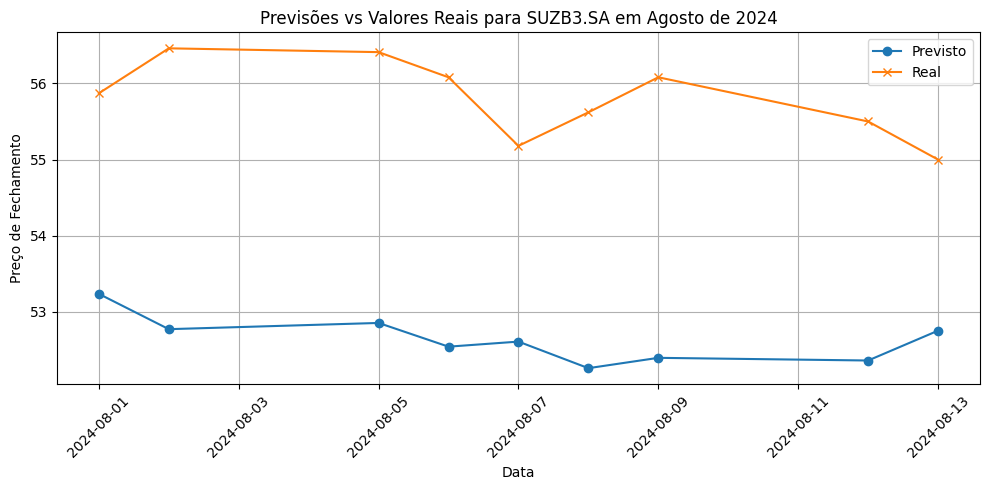


Comparação para ELET3.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  37.896201  41.400002
2024-08-02 2024-08-02  38.086200  41.500000
2024-08-05 2024-08-05  38.013358  40.900002
2024-08-06 2024-08-06  38.101300  41.880001
2024-08-07 2024-08-07  38.034400  41.880001
2024-08-08 2024-08-08  38.188700  41.400002
2024-08-09 2024-08-09  38.508454  42.040001
2024-08-12 2024-08-12  38.464879  41.299999
2024-08-13 2024-08-13  38.479664  41.750000


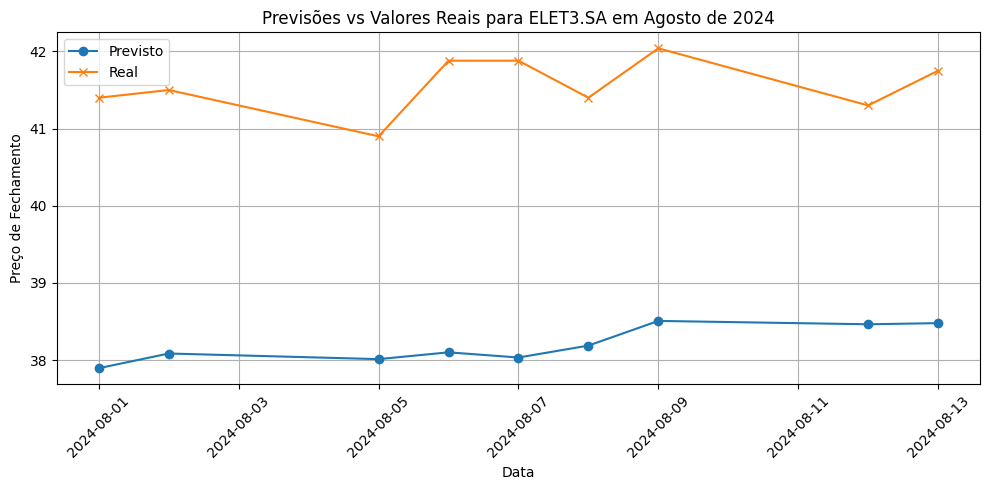

In [242]:
for ticker in tickers:
    actual_prices = real_data_prepared[ticker]['Close'].values[:len(future_data[ticker])]
    predicted_prices = future_data[ticker]

    # Garantir que ambos tenham o mesmo comprimento
    min_length = min(len(actual_prices), len(predicted_prices))

    comparison_df = pd.DataFrame({
        'Data': future_dates[:min_length],
        'Previsto': predicted_prices[:min_length],
        'Real': actual_prices[:min_length]
    })
    
    print(f'\nComparação para {ticker}:')
    print(comparison_df)

    # Plotar os resultados
    plt.figure(figsize=(10, 5))
    plt.plot(comparison_df['Data'], comparison_df['Previsto'], label='Previsto', marker='o')
    plt.plot(comparison_df['Data'], comparison_df['Real'], label='Real', marker='x')
    plt.title(f'Previsões vs Valores Reais para {ticker} em Agosto de 2024')
    plt.xlabel('Data')
    plt.ylabel('Preço de Fechamento')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Modelo de ML com RandomForestRegressor

### Extracao dos dados da lib yFinance
- Definicao das acoes que serao analisadas, colocando em uma lista.
- Define uma data inicial e limite

In [250]:
warnings.filterwarnings('ignore')

tickers = [
    'PETR4.SA',  # Petrobras
    'VALE3.SA',  # Vale
    'ITUB4.SA',  # Itaú Unibanco
    'BBDC4.SA',  # Bradesco
    'BBAS3.SA',  # Banco do Brasil
    'ABEV3.SA',  # Ambev
    'B3SA3.SA',  # B3
    'WEGE3.SA',  # WEG
    'RENT3.SA',  # Localiza
    'JBSS3.SA',  # JBS
    'MGLU3.SA',  # Magazine Luiza
    'BRFS3.SA',  # BRF
    'SUZB3.SA',  # Suzano
    'GGBR4.SA',  # Gerdau
    'CSNA3.SA',  # CSN
    'LREN3.SA',  # Lojas Renner
    'RAIL3.SA',  # Rumo
    'KLBN11.SA', # Klabin
    'EGIE3.SA',  # Engie Brasil
    'ELET3.SA'   # Eletrobras
]  
start_date = '2015-01-01'
end_date = '2024-07-31'

- Download dos dados a partir da data 

In [251]:
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

### Preparar os dados 
- Calculo do RSI (ajuda a analisar a força de uma tendência e a velocidade de movimentação de preços de um ativo.) 

In [252]:
def compute_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

- Preparar os dados para cada papel

In [255]:
def prepare_data(df):
    df['Date'] = df.index
    df['Return'] = df['Close'].pct_change()
    df['Moving_Average'] = df['Close'].rolling(window=5).mean()
    df['Volatility'] = df['Return'].rolling(window=5).std()
    df['RSI'] = compute_rsi(df['Close'])
    df.dropna(inplace=True)
    return df[['Date', 'Close', 'Moving_Average', 'Volatility', 'RSI']]

- Aplica a funcao nas acoes da lista de tickers

In [256]:
prepared_data = {}
for ticker in tickers:
    prepared_data[ticker] = prepare_data(data[ticker])

### Treinamento do modelo 
- Separacao dos dados para treino de 80% e teste de 20%
- Avaliacao do modelo de acordo com metricas como MSE e MAE

In [258]:
# Treinamento e teste para previsão
def train_and_predict(df, ticker):
    X = df[['Moving_Average', 'Volatility', 'RSI']]
    y = df['Close']

    # Divisão dos dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modelo de Regressão Random Forest
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Previsão
    y_pred = model.predict(X_test)

    # Avaliação
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Modelo para {ticker}:')
    print(f'MSE: {mse:.2f}, MAE: {mae:.2f}')

    return model

- Aplicando a funcao de treino e previsao na lista de acoes
- Previsoes para o mes de agosto de 2024 (MAE e MSE)

In [259]:
models = {}
for ticker in tickers:
    models[ticker] = train_and_predict(prepared_data[ticker], ticker)


future_dates = pd.date_range(start='2024-08-01', end='2024-08-31', freq='B')  # Dias úteis
future_data = pd.DataFrame(index=future_dates)

Modelo para PETR4.SA:
MSE: 0.37, MAE: 0.41
Modelo para VALE3.SA:
MSE: 1.51, MAE: 0.87
Modelo para ITUB4.SA:
MSE: 0.24, MAE: 0.36
Modelo para BBDC4.SA:
MSE: 0.13, MAE: 0.26
Modelo para BBAS3.SA:
MSE: 0.14, MAE: 0.27
Modelo para ABEV3.SA:
MSE: 0.06, MAE: 0.19
Modelo para B3SA3.SA:
MSE: 0.07, MAE: 0.18
Modelo para WEGE3.SA:
MSE: 0.22, MAE: 0.29
Modelo para RENT3.SA:
MSE: 0.88, MAE: 0.59
Modelo para JBSS3.SA:
MSE: 0.21, MAE: 0.33
Modelo para MGLU3.SA:
MSE: 7.20, MAE: 1.44
Modelo para BRFS3.SA:
MSE: 0.48, MAE: 0.49
Modelo para SUZB3.SA:
MSE: 1.18, MAE: 0.77
Modelo para GGBR4.SA:
MSE: 0.12, MAE: 0.25
Modelo para CSNA3.SA:
MSE: 0.27, MAE: 0.34
Modelo para LREN3.SA:
MSE: 0.46, MAE: 0.44
Modelo para RAIL3.SA:
MSE: 0.10, MAE: 0.23
Modelo para KLBN11.SA:
MSE: 0.14, MAE: 0.27
Modelo para EGIE3.SA:
MSE: 0.21, MAE: 0.33
Modelo para ELET3.SA:
MSE: 0.68, MAE: 0.59


### Previsao de resultados
- Previsao para cada acao em datas futuras

In [260]:
for ticker in tickers:
    predictions = []
    last_moving_average = prepared_data[ticker]['Moving_Average'].iloc[-1]
    last_volatility = prepared_data[ticker]['Volatility'].iloc[-1]
    last_rsi = prepared_data[ticker]['RSI'].iloc[-1]
    last_close = prepared_data[ticker]['Close'].iloc[-1]

    for date in future_dates:
        # Prever o próximo valor
        prediction = models[ticker].predict(np.array([[last_moving_average, last_volatility, last_rsi]]).reshape(1, -1))
        predictions.append(prediction[0])
        
        # Atualiza os dados para a próxima previsão
        new_row = pd.Series({
            'Moving_Average': last_moving_average,
            'Volatility': last_volatility,
            'RSI': last_rsi,
            'Close': prediction[0]
        }, name=date)
        
        prepared_data[ticker] = pd.concat([prepared_data[ticker], new_row.to_frame().T])

        # Atualizando os valores para a próxima iteração
        last_close = prediction[0]
        
        # Recalcula 'Return', 'Moving_Average', 'Volatility' e 'RSI'
        prepared_data[ticker]['Return'] = prepared_data[ticker]['Close'].pct_change()
        last_moving_average = prepared_data[ticker]['Close'].rolling(window=5).mean().iloc[-1]
        last_volatility = prepared_data[ticker]['Return'].rolling(window=5).std().iloc[-1]
        last_rsi = compute_rsi(prepared_data[ticker]['Close']).iloc[-1]

    future_data[ticker] = predictions

- Download dos dados de Agosto de 2024 de cada acao
- Preparar os dados de Agosto de 2024

In [261]:
real_data = {}
for ticker in tickers:
    real_data[ticker] = yf.download(ticker, start='2024-08-01', end='2024-09-01')

# Preparar os dados reais
real_data_prepared = {}
for ticker in tickers:
    real_data_prepared[ticker] = prepare_data(real_data[ticker])

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

### Comparar os dados 
- Comparacao de dados reais de dados previstos
- Plostagem da comparacao entre os valores


Comparação para PETR4.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  37.175301  38.290001
2024-08-02 2024-08-02  37.621500  38.060001
2024-08-05 2024-08-05  37.942100  37.119999
2024-08-06 2024-08-06  37.888800  36.889999
2024-08-07 2024-08-07  37.841300  39.570000
2024-08-08 2024-08-08  38.042200  39.040001
2024-08-09 2024-08-09  37.911500  39.599998
2024-08-12 2024-08-12  38.023200  39.330002
2024-08-13 2024-08-13  37.892200  39.369999


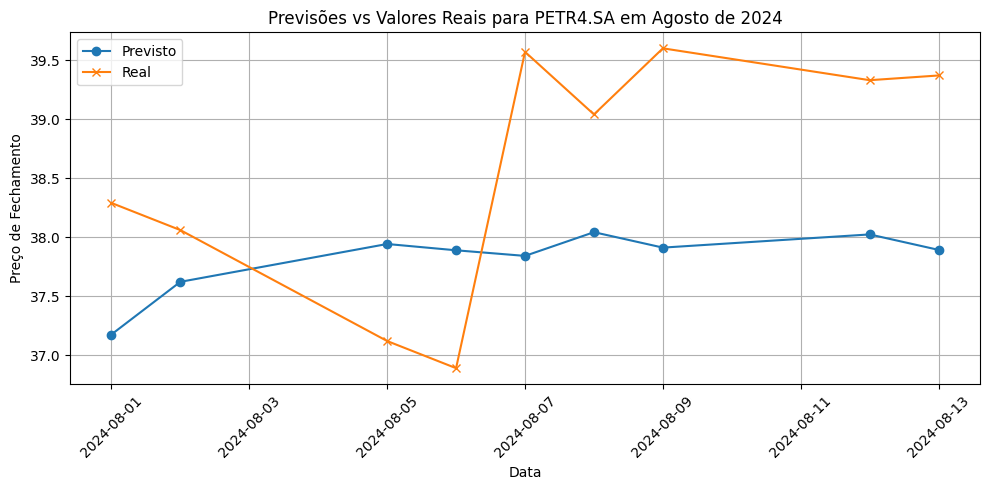


Comparação para VALE3.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  60.751901  57.200001
2024-08-02 2024-08-02  60.631601  58.299999
2024-08-05 2024-08-05  60.848801  58.380001
2024-08-06 2024-08-06  61.014701  57.400002
2024-08-07 2024-08-07  60.338400  58.049999
2024-08-08 2024-08-08  60.524901  59.799999
2024-08-09 2024-08-09  60.431100  59.369999
2024-08-12 2024-08-12  60.161600  59.299999
2024-08-13 2024-08-13  59.716701  59.580002


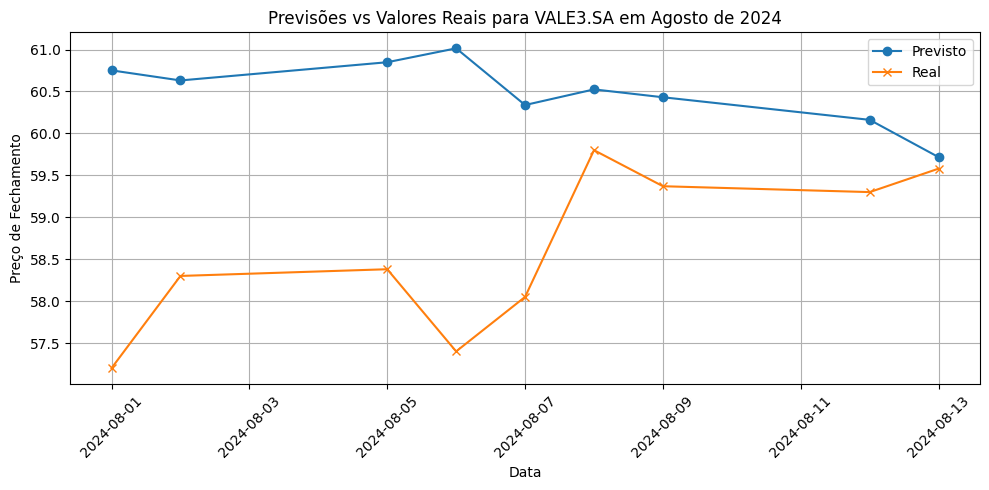


Comparação para ITUB4.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  34.375967  37.230000
2024-08-02 2024-08-02  34.383200  37.080002
2024-08-05 2024-08-05  34.366334  36.740002
2024-08-06 2024-08-06  34.400267  36.459999
2024-08-07 2024-08-07  34.449734  36.540001
2024-08-08 2024-08-08  34.351134  36.580002
2024-08-09 2024-08-09  34.350400  37.369999
2024-08-12 2024-08-12  34.404167  36.959999
2024-08-13 2024-08-13  34.471700  36.700001


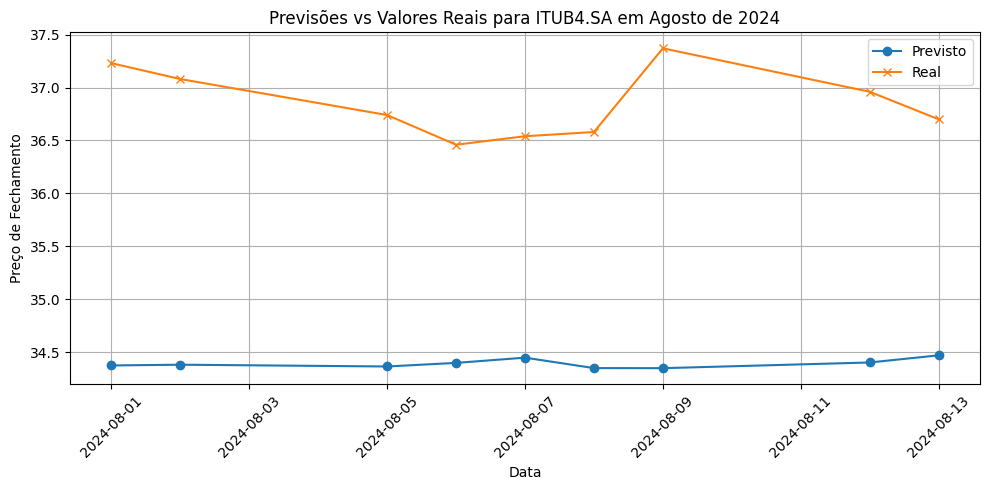


Comparação para BBDC4.SA:
                 Data   Previsto   Real
2024-08-01 2024-08-01  12.402149  15.70
2024-08-02 2024-08-02  12.410450  15.63
2024-08-05 2024-08-05  12.409591  15.52
2024-08-06 2024-08-06  12.446552  15.66
2024-08-07 2024-08-07  12.446952  15.61
2024-08-08 2024-08-08  12.330092  15.42
2024-08-09 2024-08-09  12.373369  15.67
2024-08-12 2024-08-12  12.440448  15.63
2024-08-13 2024-08-13  12.348406  15.64


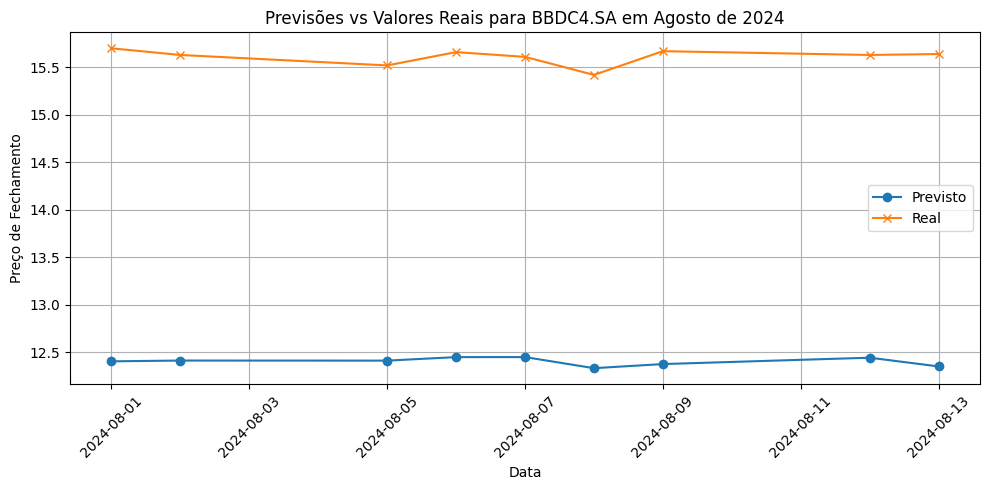


Comparação para BBAS3.SA:
                 Data  Previsto       Real
2024-08-01 2024-08-01  26.95155  29.260000
2024-08-02 2024-08-02  27.07370  29.129999
2024-08-05 2024-08-05  27.04090  28.010000
2024-08-06 2024-08-06  27.00290  28.219999
2024-08-07 2024-08-07  26.91375  28.330000
2024-08-08 2024-08-08  26.72370  28.010000
2024-08-09 2024-08-09  26.61775  28.180000
2024-08-12 2024-08-12  26.55695  28.299999
2024-08-13 2024-08-13  26.56525  28.120001


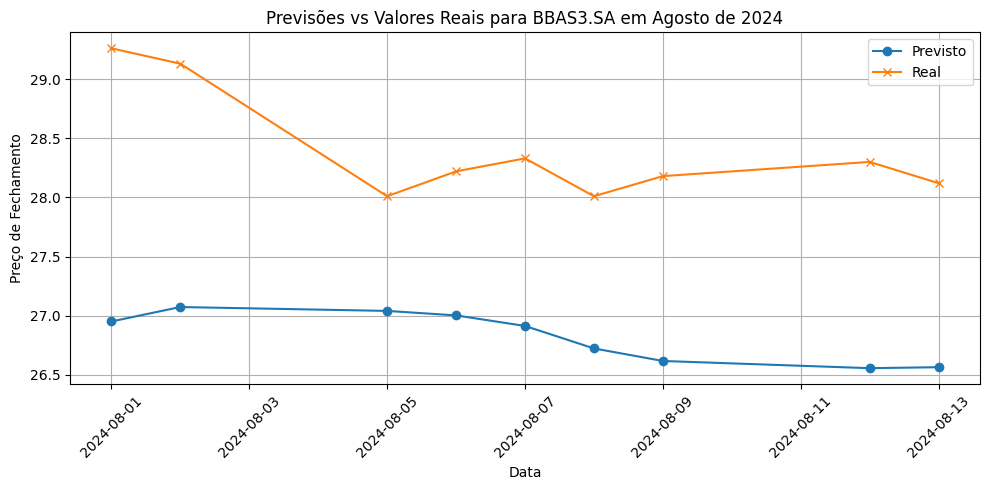


Comparação para ABEV3.SA:
                 Data  Previsto   Real
2024-08-01 2024-08-01   11.7078  12.94
2024-08-02 2024-08-02   11.7491  12.94
2024-08-05 2024-08-05   11.7788  13.00
2024-08-06 2024-08-06   11.7503  13.08
2024-08-07 2024-08-07   11.7538  13.08
2024-08-08 2024-08-08   11.7412  13.03
2024-08-09 2024-08-09   11.7898  12.95
2024-08-12 2024-08-12   11.7745  12.86
2024-08-13 2024-08-13   11.7623  12.86


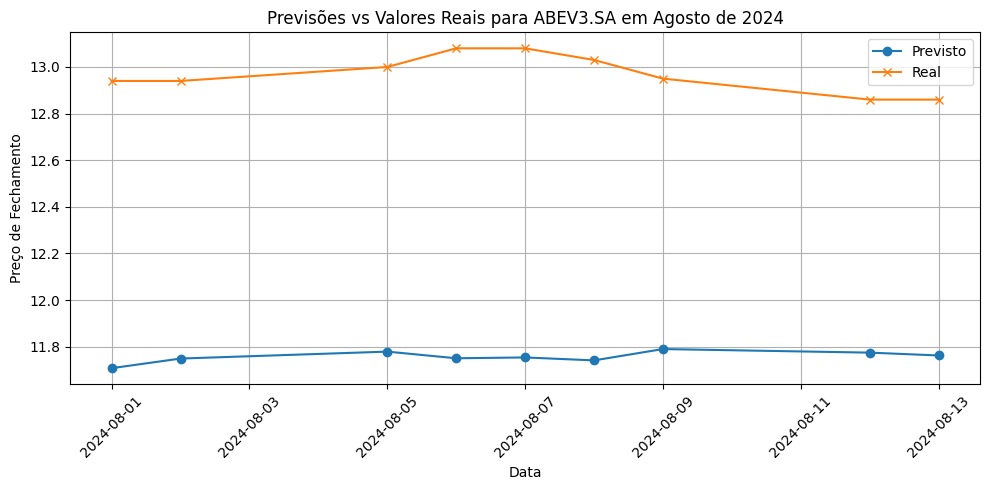


Comparação para B3SA3.SA:
                 Data   Previsto   Real
2024-08-01 2024-08-01  10.747700  12.90
2024-08-02 2024-08-02  10.671066  12.96
2024-08-05 2024-08-05  10.656867  12.54
2024-08-06 2024-08-06  10.630200  12.74
2024-08-07 2024-08-07  10.605967  12.80
2024-08-08 2024-08-08  10.602267  12.65
2024-08-09 2024-08-09  10.613900  12.70
2024-08-12 2024-08-12  10.622133  12.54
2024-08-13 2024-08-13  10.517667  12.68


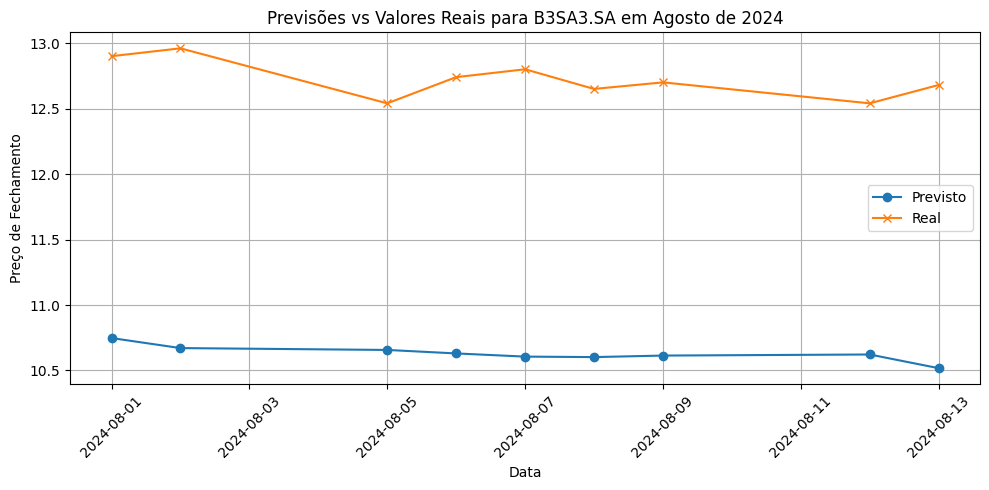


Comparação para WEGE3.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  46.159300  53.110001
2024-08-02 2024-08-02  46.107150  53.430000
2024-08-05 2024-08-05  46.407149  54.200001
2024-08-06 2024-08-06  46.234800  53.810001
2024-08-07 2024-08-07  45.800550  54.080002
2024-08-08 2024-08-08  45.769750  54.000000
2024-08-09 2024-08-09  45.769750  54.000000
2024-08-12 2024-08-12  45.780950  53.540001
2024-08-13 2024-08-13  45.615300  54.150002


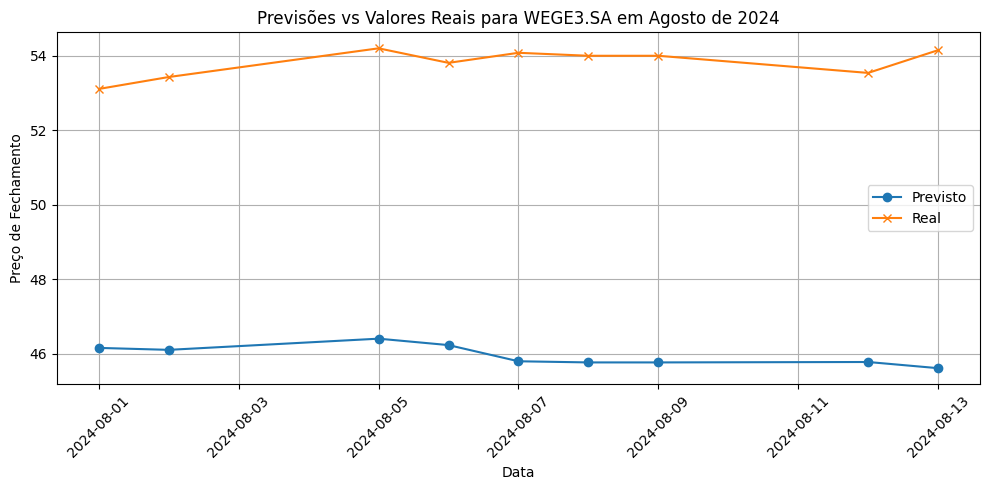


Comparação para RENT3.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  42.341065  42.970001
2024-08-02 2024-08-02  41.915818  43.700001
2024-08-05 2024-08-05  41.743374  41.939999
2024-08-06 2024-08-06  41.336228  42.299999
2024-08-07 2024-08-07  40.725495  42.279999
2024-08-08 2024-08-08  40.542134  42.900002
2024-08-09 2024-08-09  40.498007  42.500000
2024-08-12 2024-08-12  40.351245  41.750000
2024-08-13 2024-08-13  40.099844  41.369999


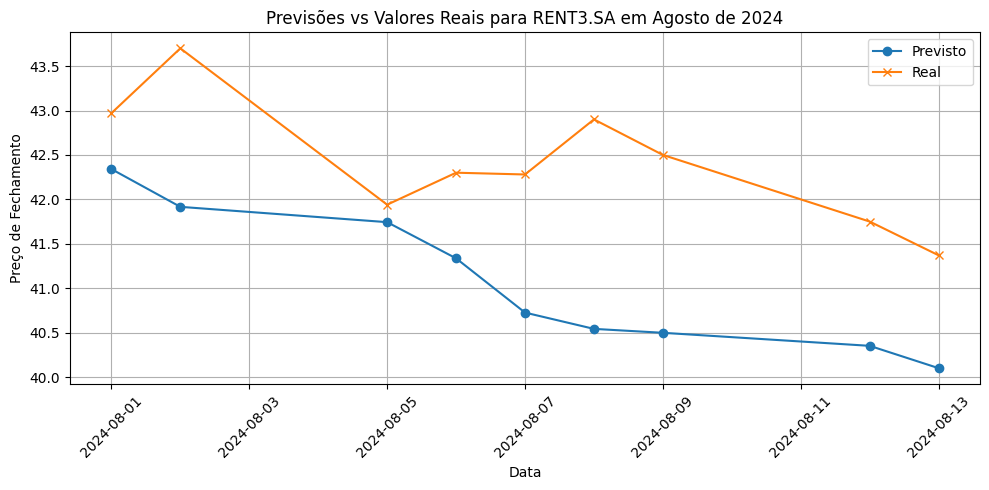


Comparação para JBSS3.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  33.845701  36.130001
2024-08-02 2024-08-02  32.301800  36.549999
2024-08-05 2024-08-05  32.899900  36.209999
2024-08-06 2024-08-06  32.499600  34.830002
2024-08-07 2024-08-07  32.145700  35.000000
2024-08-08 2024-08-08  32.561500  34.980000
2024-08-09 2024-08-09  32.717199  35.040001
2024-08-12 2024-08-12  32.414499  34.939999
2024-08-13 2024-08-13  32.309500  35.000000


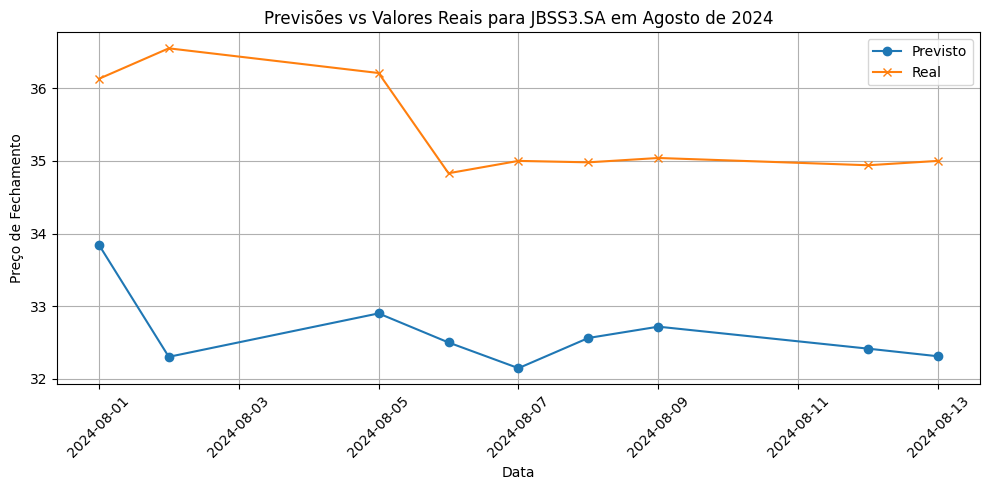


Comparação para MGLU3.SA:
                 Data   Previsto   Real
2024-08-01 2024-08-01  11.112600  13.80
2024-08-02 2024-08-02  11.124800  13.85
2024-08-05 2024-08-05  11.138300  13.18
2024-08-06 2024-08-06  10.919700  13.62
2024-08-07 2024-08-07  10.848200  13.35
2024-08-08 2024-08-08  10.837476  13.47
2024-08-09 2024-08-09  10.838493  13.18
2024-08-12 2024-08-12  10.835576  12.89
2024-08-13 2024-08-13  10.835576  12.16


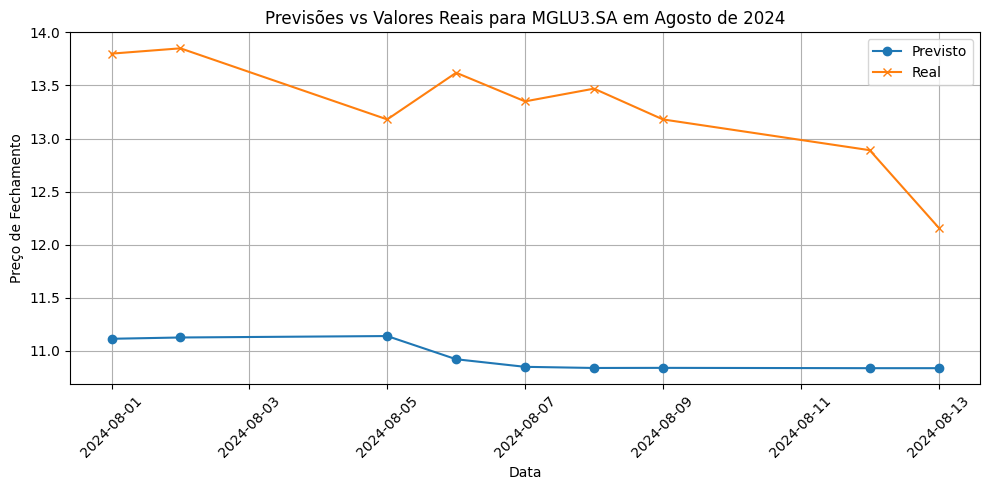


Comparação para BRFS3.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  21.221031  25.400000
2024-08-02 2024-08-02  21.032903  26.030001
2024-08-05 2024-08-05  20.795599  25.709999
2024-08-06 2024-08-06  20.870412  25.190001
2024-08-07 2024-08-07  20.887356  25.299999
2024-08-08 2024-08-08  20.865850  25.910000
2024-08-09 2024-08-09  20.846814  26.030001
2024-08-12 2024-08-12  20.609599  25.799999
2024-08-13 2024-08-13  20.344208  26.230000


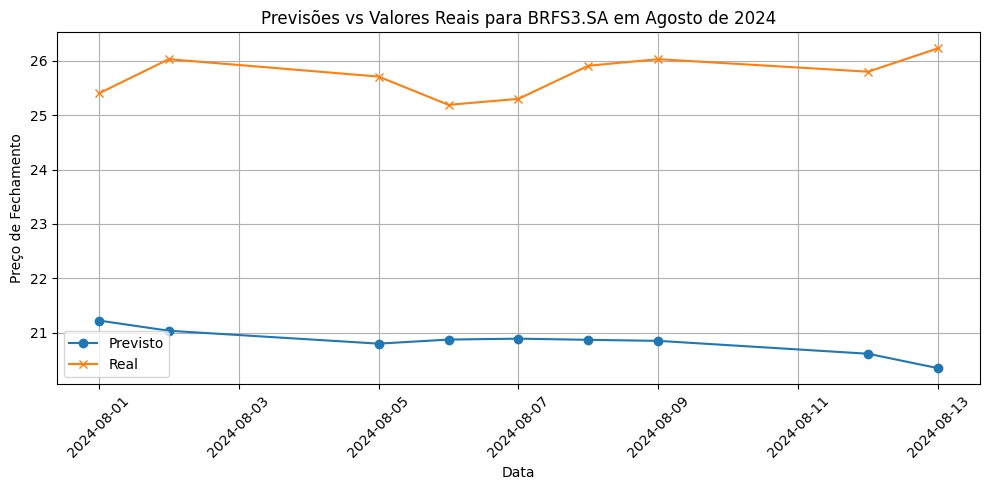


Comparação para SUZB3.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  53.292499  55.869999
2024-08-02 2024-08-02  52.841500  56.459999
2024-08-05 2024-08-05  53.141899  56.410000
2024-08-06 2024-08-06  52.726900  56.080002
2024-08-07 2024-08-07  52.726500  55.180000
2024-08-08 2024-08-08  52.606501  55.619999
2024-08-09 2024-08-09  52.263701  56.080002
2024-08-12 2024-08-12  52.344901  55.500000
2024-08-13 2024-08-13  52.216000  55.000000


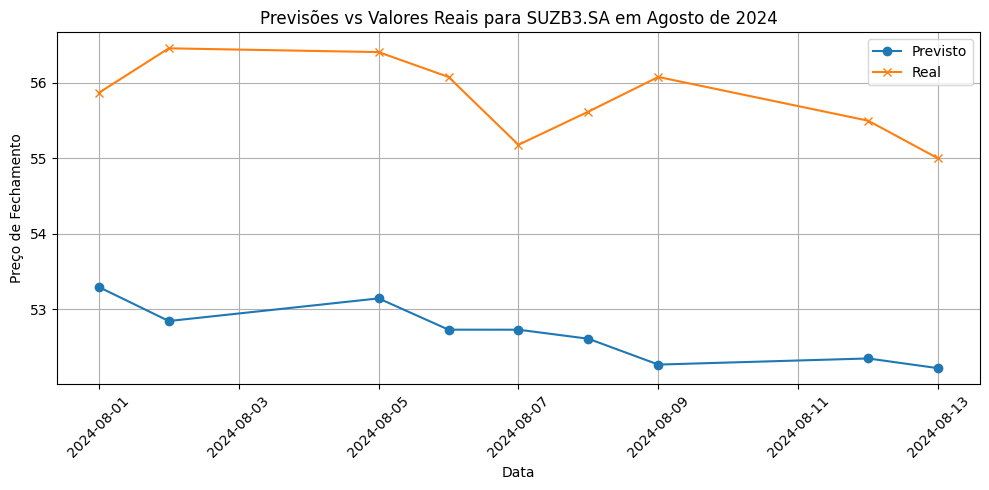


Comparação para GGBR4.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  18.040657  17.750000
2024-08-02 2024-08-02  17.896826  18.430000
2024-08-05 2024-08-05  18.001636  18.280001
2024-08-06 2024-08-06  18.028286  18.280001
2024-08-07 2024-08-07  17.847143  18.420000
2024-08-08 2024-08-08  17.577182  18.270000
2024-08-09 2024-08-09  17.569890  18.059999
2024-08-12 2024-08-12  17.558270  18.469999
2024-08-13 2024-08-13  17.475842  18.299999


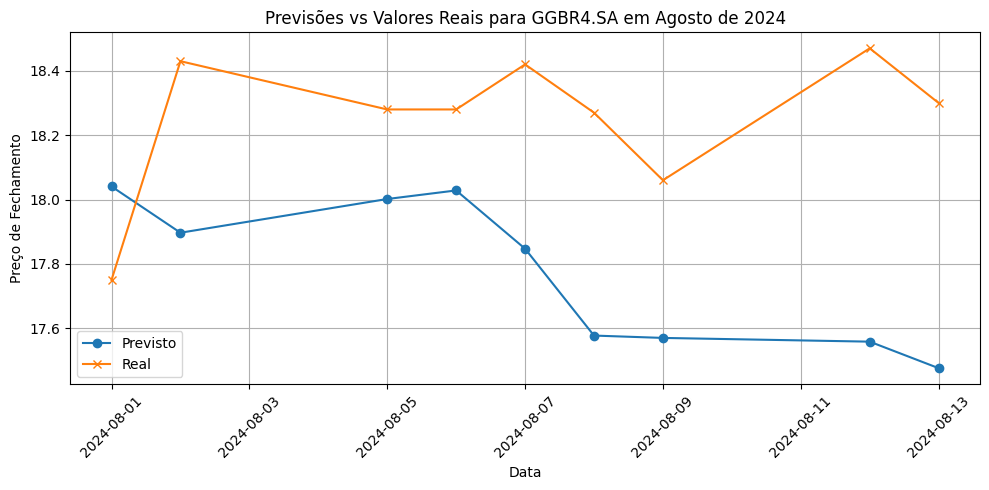


Comparação para CSNA3.SA:
                 Data  Previsto   Real
2024-08-01 2024-08-01   11.7981  11.89
2024-08-02 2024-08-02   11.6899  12.33
2024-08-05 2024-08-05   11.5136  12.13
2024-08-06 2024-08-06   11.4834  12.25
2024-08-07 2024-08-07   11.4798  12.22
2024-08-08 2024-08-08   11.4727  12.29
2024-08-09 2024-08-09   11.5187  11.91
2024-08-12 2024-08-12   11.0515  11.93
2024-08-13 2024-08-13   10.8593  11.86


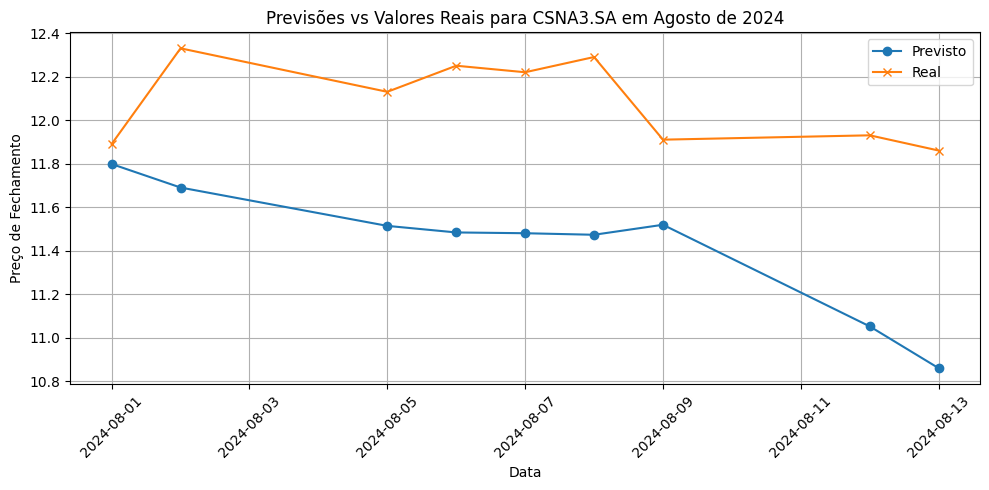


Comparação para LREN3.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  13.045540  16.959999
2024-08-02 2024-08-02  13.131633  16.900000
2024-08-05 2024-08-05  13.048860  16.540001
2024-08-06 2024-08-06  13.040005  17.750000
2024-08-07 2024-08-07  13.074643  17.700001
2024-08-08 2024-08-08  13.061902  18.350000
2024-08-09 2024-08-09  12.971899  17.660000
2024-08-12 2024-08-12  12.939523  17.049999
2024-08-13 2024-08-13  12.866230  17.299999


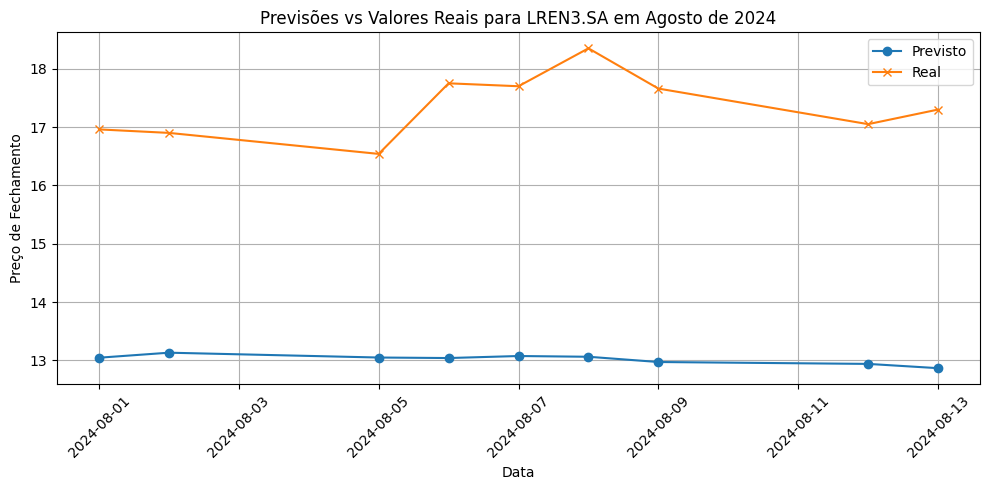


Comparação para RAIL3.SA:
                 Data  Previsto       Real
2024-08-01 2024-08-01   22.1846  23.650000
2024-08-02 2024-08-02   22.2025  23.500000
2024-08-05 2024-08-05   22.2087  23.379999
2024-08-06 2024-08-06   22.0896  23.610001
2024-08-07 2024-08-07   22.0722  22.920000
2024-08-08 2024-08-08   21.9949  22.850000
2024-08-09 2024-08-09   22.0204  22.549999
2024-08-12 2024-08-12   21.9937  22.040001
2024-08-13 2024-08-13   21.9441  21.850000


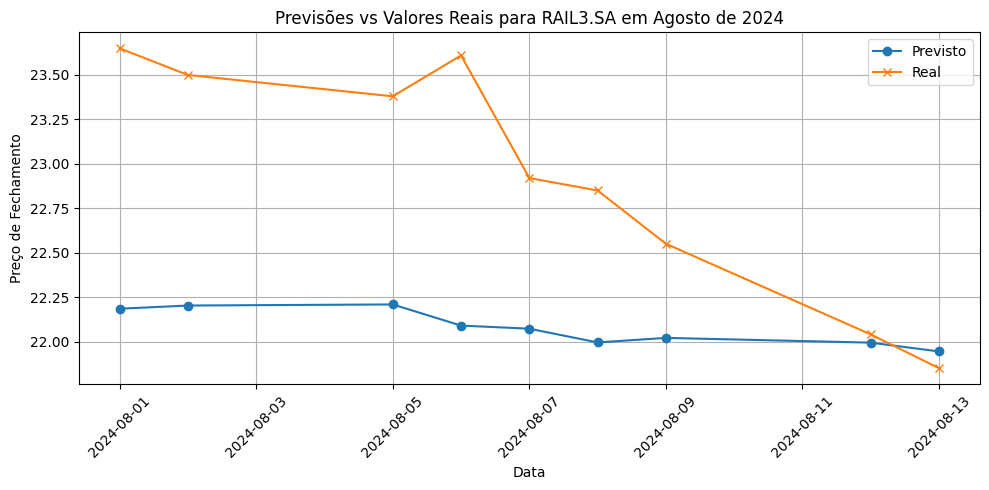


Comparação para KLBN11.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  21.927836  21.950001
2024-08-02 2024-08-02  21.972972  22.150000
2024-08-05 2024-08-05  21.960008  22.090000
2024-08-06 2024-08-06  21.913344  22.139999
2024-08-07 2024-08-07  21.984663  22.049999
2024-08-08 2024-08-08  22.025118  21.990000
2024-08-09 2024-08-09  21.987345  21.959999
2024-08-12 2024-08-12  21.941754  21.650000
2024-08-13 2024-08-13  21.636818  21.590000


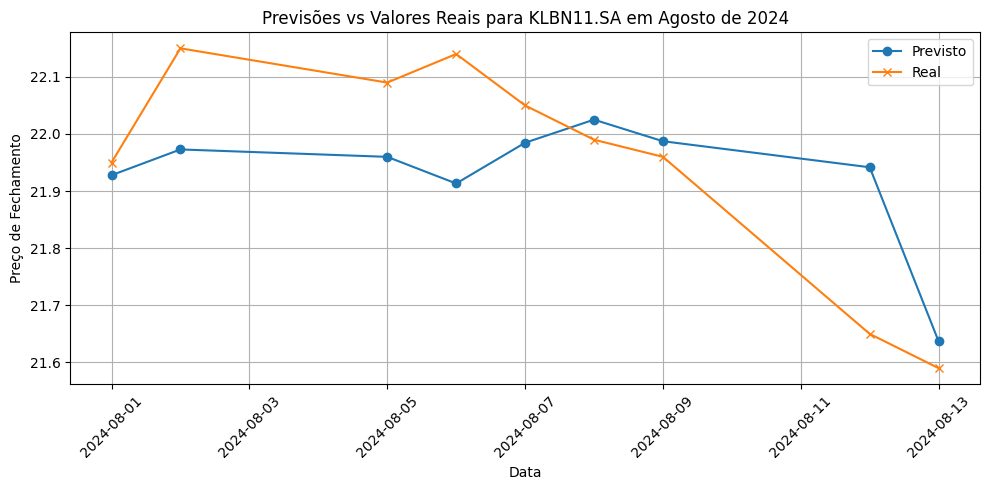


Comparação para EGIE3.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  44.108799  46.529999
2024-08-02 2024-08-02  44.224700  47.070000
2024-08-05 2024-08-05  44.110200  46.009998
2024-08-06 2024-08-06  44.140800  45.799999
2024-08-07 2024-08-07  43.968200  45.110001
2024-08-08 2024-08-08  43.757300  44.720001
2024-08-09 2024-08-09  43.682400  44.410000
2024-08-12 2024-08-12  43.422600  44.139999
2024-08-13 2024-08-13  43.348400  45.160000


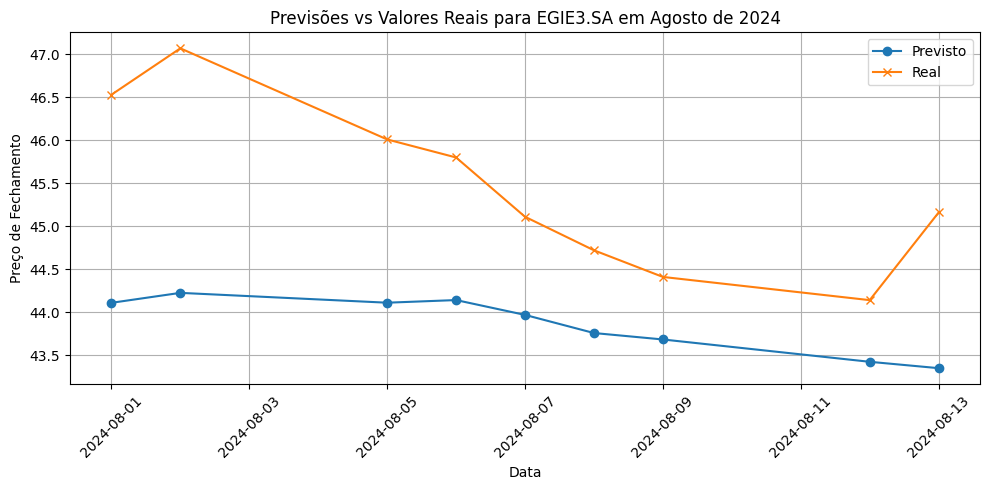


Comparação para ELET3.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  37.776563  41.400002
2024-08-02 2024-08-02  37.802952  41.500000
2024-08-05 2024-08-05  37.874601  40.900002
2024-08-06 2024-08-06  37.780150  41.880001
2024-08-07 2024-08-07  37.566158  41.880001
2024-08-08 2024-08-08  37.766433  41.400002
2024-08-09 2024-08-09  37.994268  42.040001
2024-08-12 2024-08-12  37.928145  41.299999
2024-08-13 2024-08-13  37.999717  41.750000


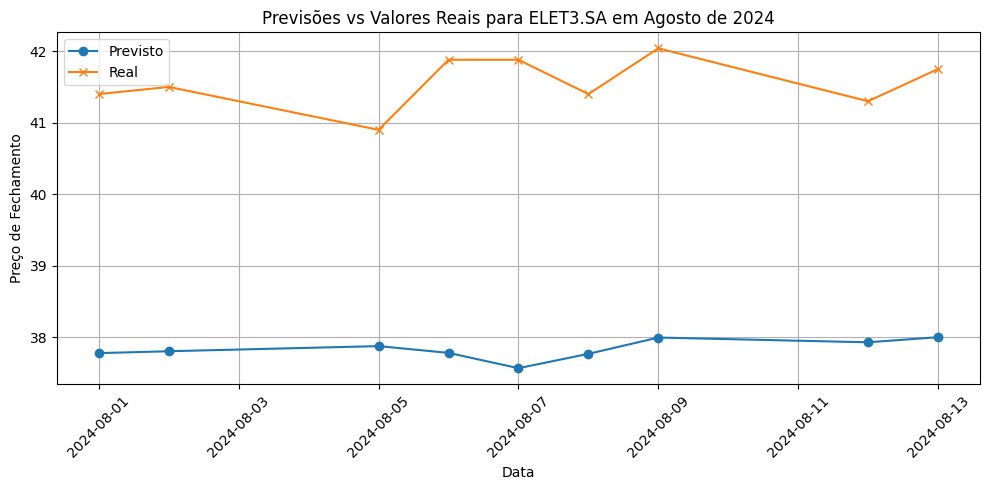

In [262]:
# Comparar previsões com dados reais
for ticker in tickers:
    actual_prices = real_data_prepared[ticker]['Close'].values[:len(future_data[ticker])]
    predicted_prices = future_data[ticker]

    # Garantir que ambos tenham o mesmo comprimento
    min_length = min(len(actual_prices), len(predicted_prices))

    comparison_df = pd.DataFrame({
        'Data': future_dates[:min_length],
        'Previsto': predicted_prices[:min_length],
        'Real': actual_prices[:min_length]
    })
    
    print(f'\nComparação para {ticker}:')
    print(comparison_df)

    # Plotar os resultados
    plt.figure(figsize=(10, 5))
    plt.plot(comparison_df['Data'], comparison_df['Previsto'], label='Previsto', marker='o')
    plt.plot(comparison_df['Data'], comparison_df['Real'], label='Real', marker='x')
    plt.title(f'Previsões vs Valores Reais para {ticker} em Agosto de 2024')
    plt.xlabel('Data')
    plt.ylabel('Preço de Fechamento')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# RandomForestRegressor com GridSearchCV
- **GridSearchCV** é uma ferramenta poderosa para otimizar os hiperparametros de um modelo de aprendizado de maquina


- Define uma lista de acões que serão análisadas

In [218]:
warnings.filterwarnings('ignore')

# Defina os papéis que você deseja analisar
principais_papeis = [
    'PETR4.SA',  # Petrobras
    'VALE3.SA',  # Vale
    'ITUB4.SA',  # Itaú Unibanco
    'BBDC4.SA',  # Bradesco
    'BBAS3.SA',  # Banco do Brasil
    'ABEV3.SA',  # Ambev
    'B3SA3.SA',  # B3
    'WEGE3.SA',  # WEG
    'RENT3.SA',  # Localiza
    'JBSS3.SA',  # JBS
    'MGLU3.SA',  # Magazine Luiza
    'BRFS3.SA',  # BRF
    'SUZB3.SA',  # Suzano
    'GGBR4.SA',  # Gerdau
    'CSNA3.SA',  # CSN
    'LREN3.SA',  # Lojas Renner
    'RAIL3.SA',  # Rumo
    'KLBN11.SA', # Klabin
    'EGIE3.SA',  # Engie Brasil
    'ELET3.SA'   # Eletrobras
]

- Define uma data inicial e limite para o download das informacoes

In [219]:
start_date = '2015-01-01'
end_date = '2024-07-31'

data = {}
for ticker in principais_papeis:
    data[ticker] = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

### Preparação dos dados
- Calcula o RSI
- Prepara os dados de cada ação

In [220]:
def compute_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [221]:
def prepare_data(df):
    df['Date'] = df.index
    df['Return'] = df['Close'].pct_change()
    df['Moving_Average'] = df['Close'].rolling(window=5).mean()
    df['Volatility'] = df['Return'].rolling(window=5).std()
    df['RSI'] = compute_rsi(df['Close'])
    df['Volume'] = df['Volume']  # Adiciona o volume
    df.dropna(inplace=True)
    return df[['Date', 'Close', 'Moving_Average', 'Volatility', 'RSI', 'Volume']]

- Aplica a função para cada ação

In [223]:
prepared_data = {}
for ticker in principais_papeis:
    prepared_data[ticker] = prepare_data(data[ticker])

### Treinamento do modelo com RandomForestRegressor com GridSearchCV
- Separação dos dados em treino de 80% e teste de 20%
- Avaliacao do modelo com metricas de MSE e MAE

In [239]:
# Treinamento e teste para previsão
def train_and_predict(df, ticker):
    X = df[['Moving_Average', 'Volatility', 'RSI', 'Volume']]
    y = df['Close']

    # Divisão dos dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Parâmetros para GridSearch
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
2
    # GridSearch para encontrar os melhores parâmetros
    grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Modelo otimizado
    model = grid_search.best_estimator_

    # Previsão
    y_pred = model.predict(X_test)

    # Avaliação
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Modelo para {ticker}:')
    print(f'MSE: {mse:.2f}, MAE: {mae:.2f}')

    comparison_df = pd.DataFrame({
    'Data': future_dates[:min_length],
    'Previsto': predicted_prices[:min_length],
    'Real': actual_prices[:min_length]
    })

    return mse, mae, model

- Aplica o treinamento para cada ação, mostrando o resultado dos erros

In [225]:
results = {}
for ticker in tickers:
    mse, mae, model = train_and_predict(prepared_data[ticker], ticker)
    results[ticker] = {'MSE': mse, 'MAE': mae, 'Model': model}

Modelo para PETR4.SA:
MSE: 0.37, MAE: 0.41
Modelo para VALE3.SA:
MSE: 1.54, MAE: 0.87
Modelo para ITUB4.SA:
MSE: 0.23, MAE: 0.35
Modelo para BBDC4.SA:
MSE: 0.13, MAE: 0.26
Modelo para BBAS3.SA:
MSE: 0.13, MAE: 0.27
Modelo para ABEV3.SA:
MSE: 0.06, MAE: 0.18
Modelo para B3SA3.SA:
MSE: 0.07, MAE: 0.18
Modelo para WEGE3.SA:
MSE: 0.21, MAE: 0.29
Modelo para RENT3.SA:
MSE: 0.98, MAE: 0.62
Modelo para JBSS3.SA:
MSE: 0.21, MAE: 0.33
Modelo para MGLU3.SA:
MSE: 7.82, MAE: 1.45
Modelo para BRFS3.SA:
MSE: 0.51, MAE: 0.49
Modelo para SUZB3.SA:
MSE: 1.13, MAE: 0.77
Modelo para GGBR4.SA:
MSE: 0.13, MAE: 0.25
Modelo para CSNA3.SA:
MSE: 0.29, MAE: 0.34
Modelo para LREN3.SA:
MSE: 0.45, MAE: 0.44
Modelo para RAIL3.SA:
MSE: 0.10, MAE: 0.23
Modelo para KLBN11.SA:
MSE: 0.13, MAE: 0.26
Modelo para EGIE3.SA:
MSE: 0.21, MAE: 0.33
Modelo para ELET3.SA:
MSE: 0.68, MAE: 0.58


- Analisa os resultados de cada acao e verifica qual teve o melhor indice de erro

In [231]:
# Analisando os resultados para encontrar o melhor papel
best_ticker = min(results, key=lambda x: results[x]['MSE'])
best_mse = results[best_ticker]['MSE']
best_mae = results[best_ticker]['MAE']

print(f'\nMelhor papel baseado no MSE: {best_ticker} com MSE: {best_mse:.2f} e MAE: {best_mae:.2f}')



Melhor papel baseado no MSE: ABEV3.SA com MSE: 0.06 e MAE: 0.18
